In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
file_path = 'transaction_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

In [3]:
categorical_cols = ['type']  # Assuming 'nameOrig' and 'nameDest' are excluded
numerical_cols = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']

# Define transformers
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], n_jobs=-1)

In [9]:
n_iterations = 10

preprocessed_samples = []

# Generate and preprocess the samples
for i in range(n_iterations):
    # Take a random sample of the data
    sample = data.sample(frac=0.15, random_state=i)
    # Preprocess the sample and store it
    preprocessed_samples.append(preprocessor.fit_transform(sample))


In [10]:
X_pcas = []
cumulative_explained_variance = []
pcas = []

for i in range(n_iterations):
    pcas.append(PCA())
    X_pcas.append(pcas[i].fit_transform(preprocessed_samples[i]))

    # Calculate cumulative explained variance
    cumulative_explained_variance.append(pcas[i].explained_variance_ratio_.cumsum())

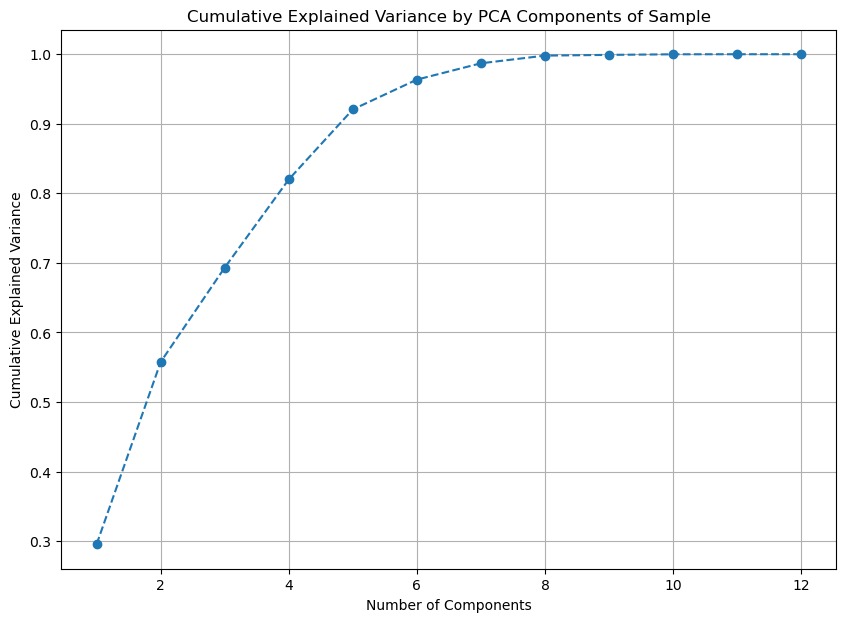

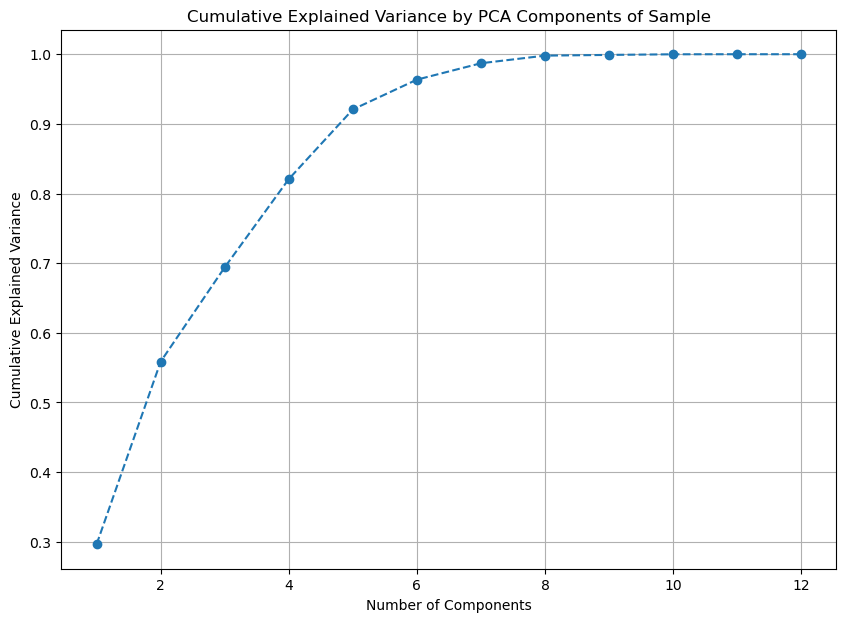

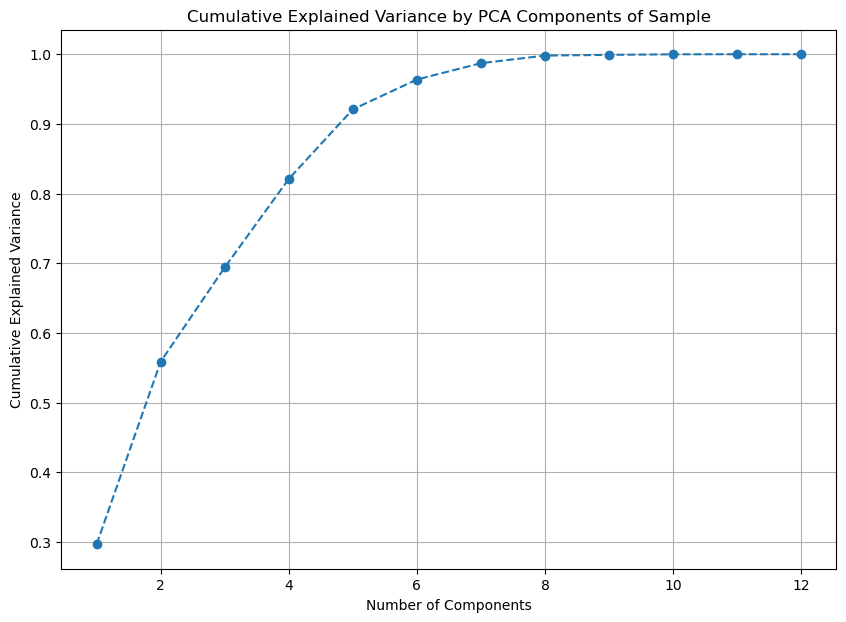

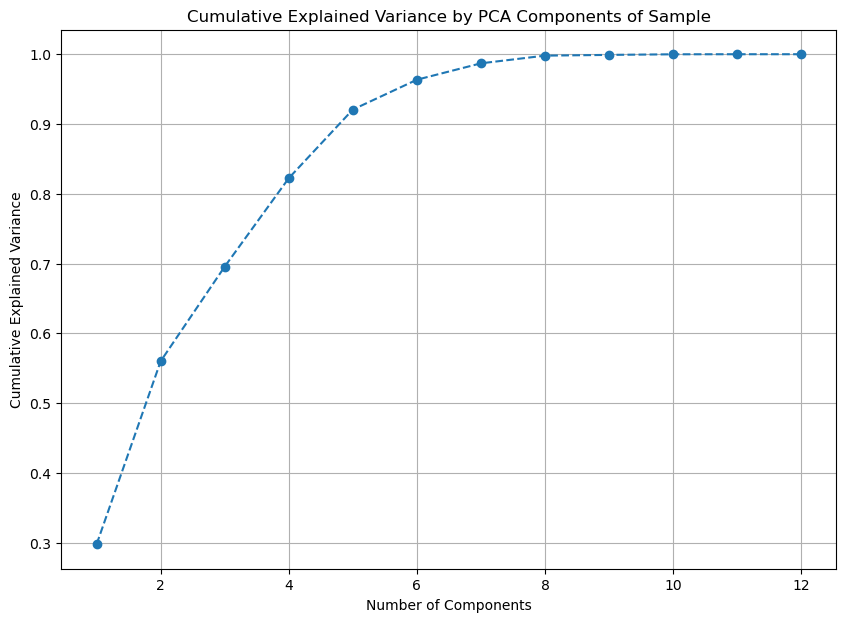

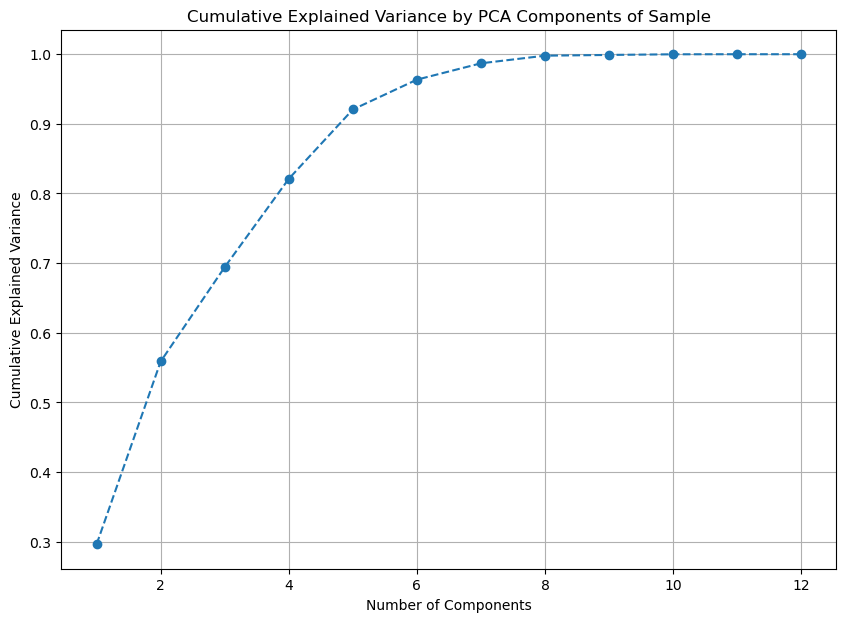

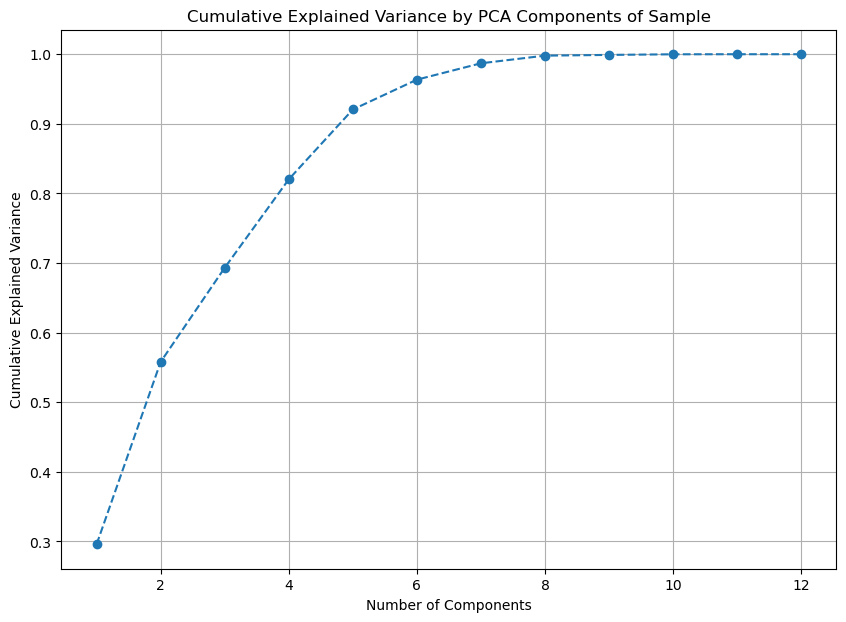

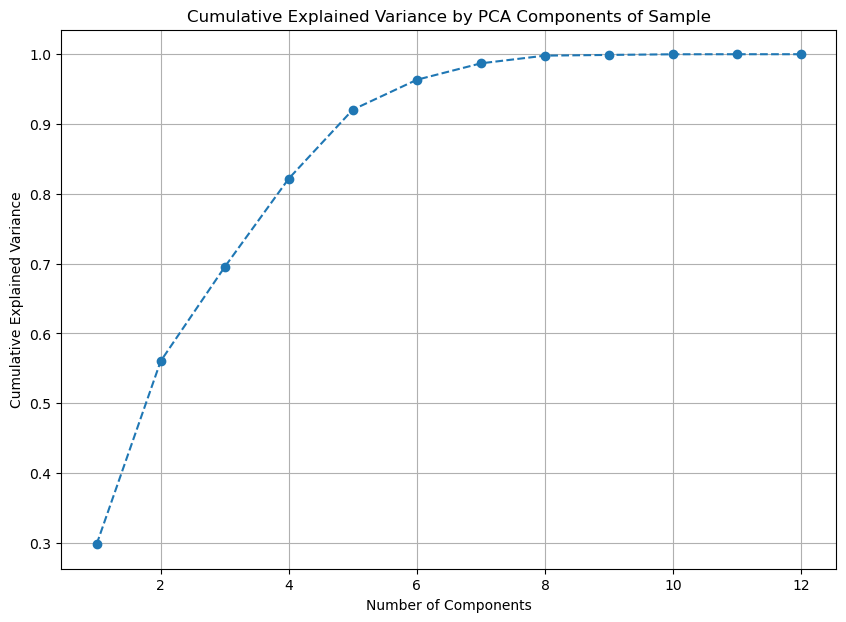

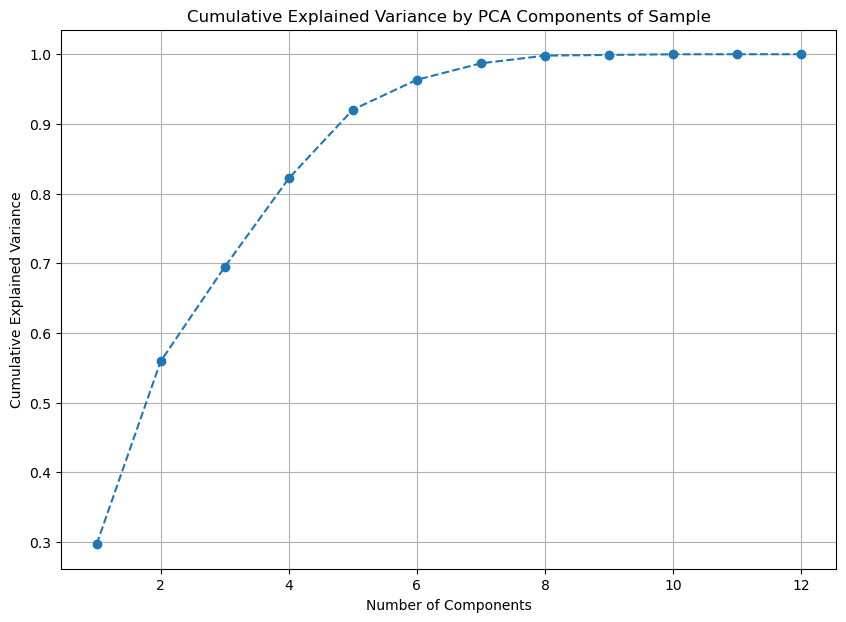

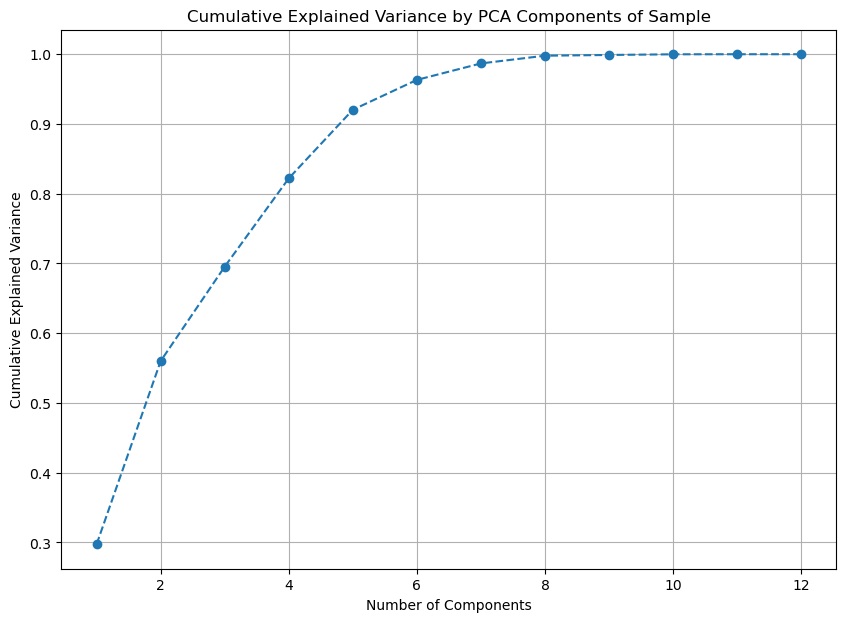

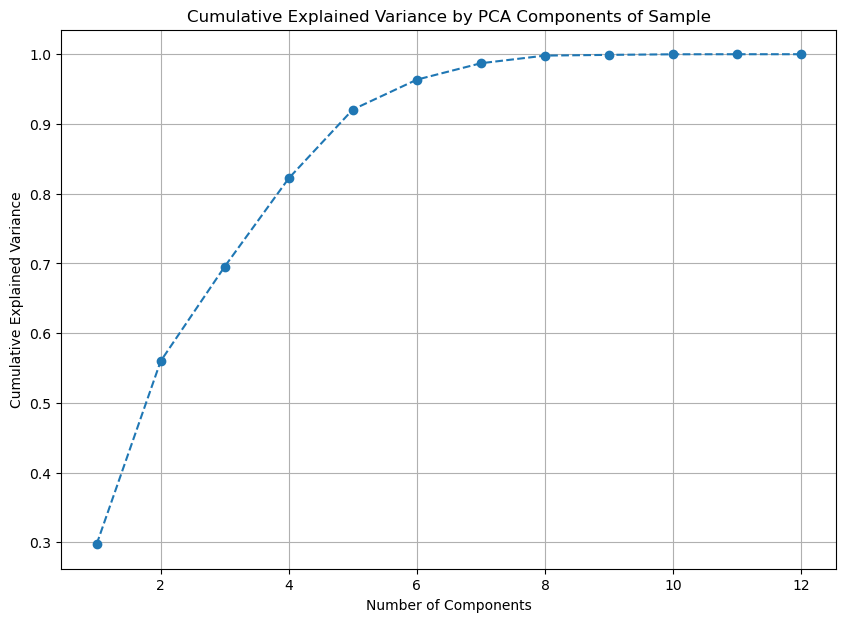

In [12]:
for i in range(n_iterations):
    plt.figure(figsize=(10,7))
    plt.plot(range(1, len(cumulative_explained_variance[i]) + 1), cumulative_explained_variance[i], marker='o', linestyle='--')
    plt.title('Cumulative Explained Variance by PCA Components of Sample')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.show()

In [13]:
n_components_to_explain_variance = []

for i in range(n_iterations):
    n_components_to_explain_variance.append(next(i for i, v in enumerate(cumulative_explained_variance[i]) if v > 0.95) + 1)
    component = n_components_to_explain_variance[i]
    print(f"Number of components at sample", i, " to explain 95% of variance: {component}")

Number of components at sample 0  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 1  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 2  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 3  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 4  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 5  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 6  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 7  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 8  to explain 95% of variance: {n_components_to_explain_variance[i]}
Number of components at sample 9  to explain 95% of variance: {n_components_to_explain_variance[i]}


In [8]:
for i in range(n_iterations):
    loadings = pcas[i].components_[:n_components_to_explain_variance[i]]
    print(loadings)
    print("\n")

[[ 2.67819608e-02  3.57633800e-01  2.92618885e-01  2.92365989e-01
   5.74104306e-01  5.93267527e-01  2.06129744e-02  7.40047472e-02
  -6.95284259e-04 -3.83832654e-04 -1.07714808e-01  3.47891780e-02]
 [ 2.91184790e-02  2.08845911e-01 -6.27750150e-01 -6.29111478e-01
   2.42257032e-01  2.76950753e-01  1.58375518e-02 -1.44499128e-01
   8.55332514e-02  1.03029212e-03  1.98103642e-02  3.81252201e-02]
 [ 5.59448118e-01  1.83540903e-01  2.31997381e-02  8.41354452e-03
  -1.09164856e-01 -7.60722055e-02  7.96332503e-01 -3.22072225e-03
  -1.30847536e-02 -5.40331954e-04 -8.13541963e-03  2.49812275e-02]
 [-8.27537627e-01  1.61459697e-01  4.91413193e-03 -5.68565279e-03
  -5.85734377e-02 -2.51628416e-02  5.32841706e-01 -9.85160975e-03
   8.64392111e-03 -6.55206508e-04 -2.02526399e-02  2.21155351e-02]
 [ 1.85816128e-02  8.56411908e-01  2.47995673e-02  2.56341525e-02
  -3.71818349e-01 -1.83142193e-01 -2.83997409e-01  1.25505769e-03
  -5.93257950e-02 -2.50086011e-03 -2.94424400e-02  9.00140374e-02]
 [-1.